## DATA 601 - Homework Assignment 2
### Deadline: 23:59 pm, October 10, 2021
This week, you will work on four datasets. You can either download these csv files from our GitHub repository or the Blackboard page to work with files locally or you can use the "requests" module and access these files online (as explained in DATA601Lecture02_p2_Python_IO.pdf, slide 47). <br>

Here's a link to the repo: 
<a href="https://github.com/simsekergun/DATA601/tree/main/2021Fall/datasets">Datasets</a> <br>

Note that in this assignment, 
 - You are not allowed to use pandas, because we haven't learned it yet. So you need to use the "csv" module to read these csv files. 
 - All the csv files have a header.  You can skip the header with the next function, e,g. assuming you are reading local files <br>
 
   readCSV = csv.reader(csvfile, delimiter=',') <br>
   next(readCSV)<br>
 - Do not forget that the "csv.reader" reads everything as text. You will need to convert those readings to integers and floats, when necessary. <br>
 - Do not forget labeling x and y-axes, using grids and legends (if there are more than one line).

### [<span style="color: red;">9 points</span>] Question 1
a. Read the "HW2_People.csv" with the csv module's reader function and create lists of firstnames, lastnames, birthyears, birthmonths, birthdays, weights. Note that first two lists would be strings, the following three are interegs, and the last one is a list floats. <br>
b. Determine the length of the one of the lists. <br>
c. Plot the histogram of "weights" using 16 bins. <br>
d. Define "edges" and determine the number of people younger than 18, older than 65, and the rest. Plot the histogram showing the number of people in these three age groups. Your figure should look like this (with labels) <br>
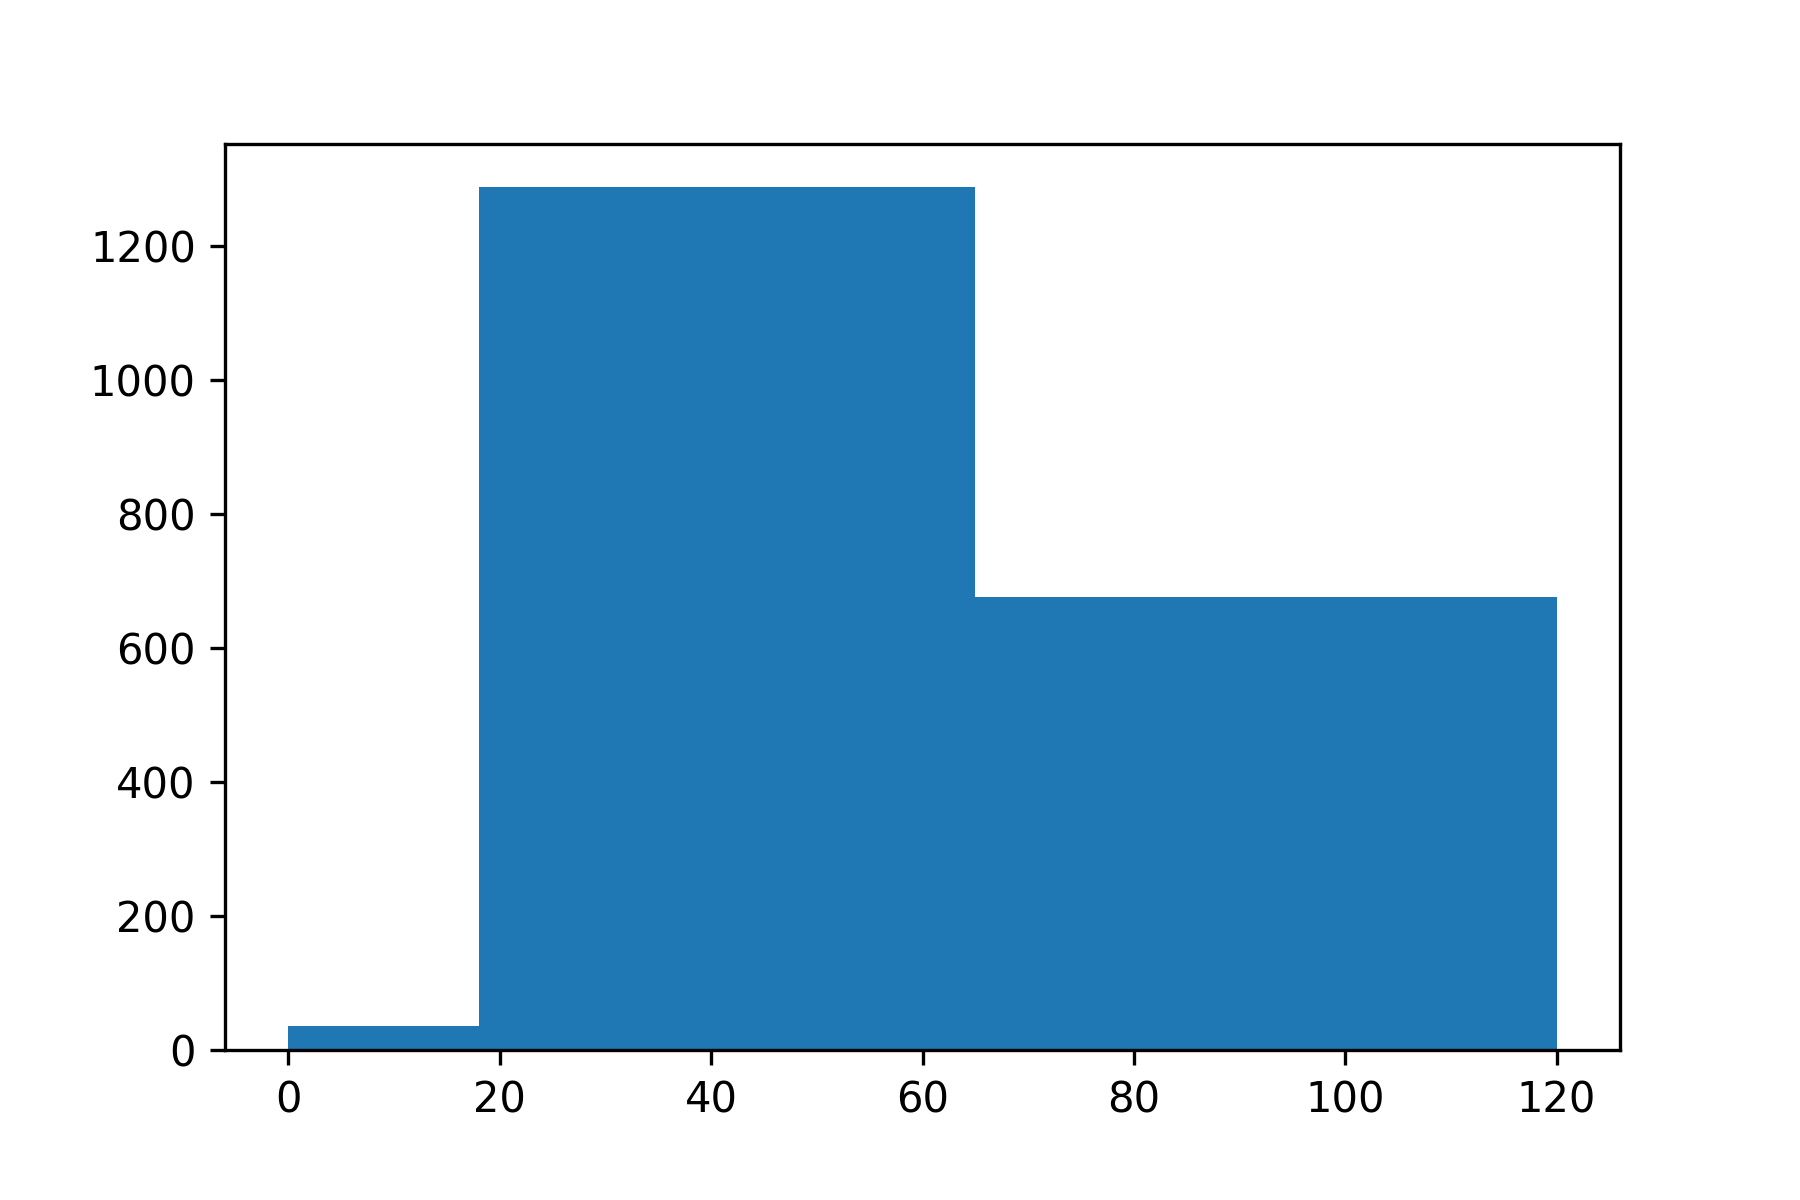

e. Convert the list "weight" to a numpy array (e.g. w = np.asarray(weights)), sort "w", and plot it, where x axis will be the index (i.e. changing from 1 to 2000). On the same figure, plot the average weight with a horizontal dashed line, as shown below.  <br>
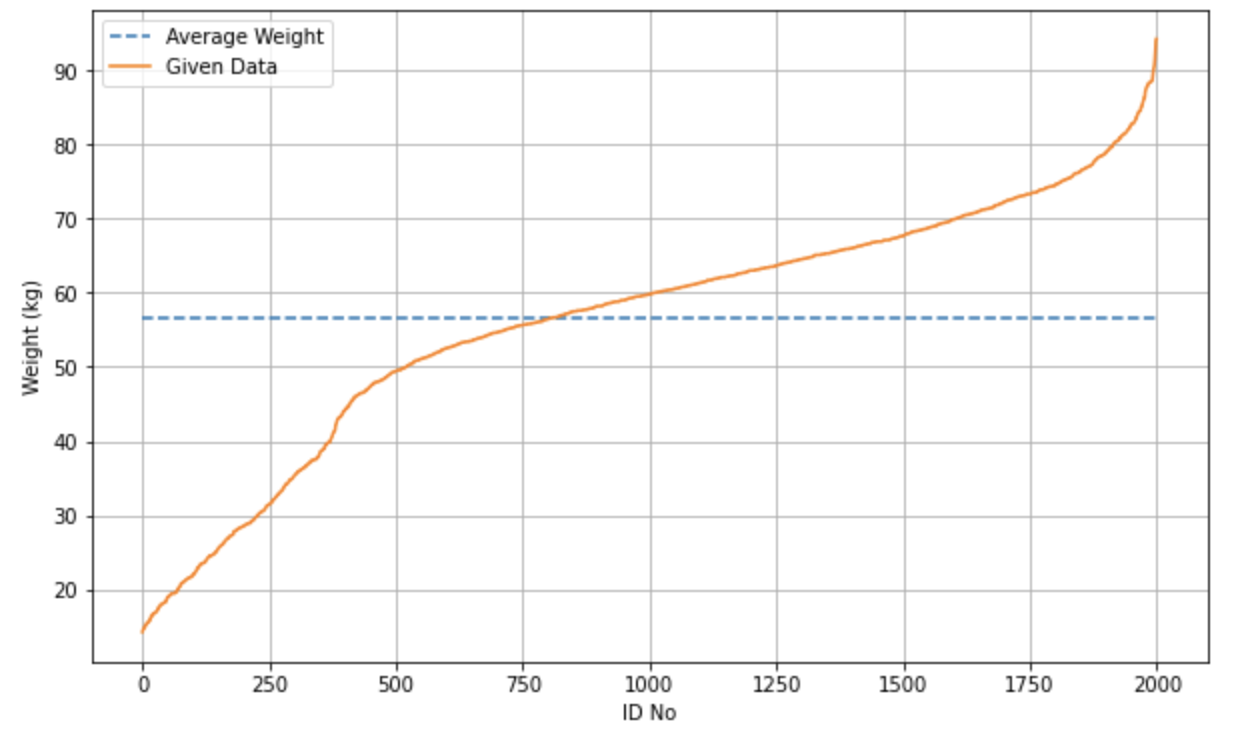

f. Plot the histograms of birth-years with 7 bins, birth-months with 12 bins, days of the births with 16 bins. <br>
g. Determine mean, max, and min weights. <br>
h. Determine mean, max, and min ages (with respect to current year, 2021). <br>

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
#(a)
CSV_URL="https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HW2_People.csv"
response=requests.get(CSV_URL)
with requests.Session() as s:
    download=s.get(CSV_URL)
    decoded_content=download.content.decode('utf-8')
    csvreader = csv.reader(decoded_content.splitlines(),delimiter=',')
    next(csvreader)
    firstnames = []
    lastnames = []
    birthyears = []
    birthmonths = []
    birthdays = [] 
    weights = []
    for row in csvreader:
        firstnames.append(row[0])
        lastnames.append(row[1])
        birthyears.append(int(row[2]))
        birthmonths.append(int(row[3]))
        birthdays.append(int(row[4]))
        weights.append(float(row[5]))
#print(firstnames)

In [3]:
#(b)
print(f"length of lastnames list is: {len(lastnames)}")

length of lastnames list is: 2000


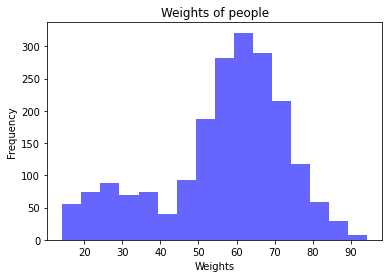

In [4]:
#(c)
plt.hist(weights, bins=16, alpha=0.6,
         color='blue',
         edgecolor='none')
plt.title('Weights of people')
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.show()

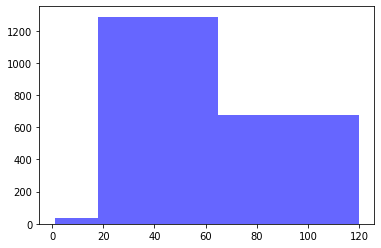

In [5]:
#(d)
edges=[1,18,65,120]
plt.hist(weights,bins=edges,alpha=0.6,
         color='blue',
         edgecolor='none')
plt.show()

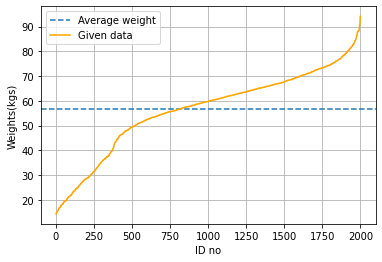

In [6]:
#(e)
import numpy as np
w=np.asarray(weights)
w.sort()
x=np.linspace(1,2000,2000)
plt.axhline(y=np.average(w),label="Average weight",linestyle="--")
plt.plot(x,w,label="Given data",color="orange")
plt.xlabel("ID no")
plt.ylabel("Weights(kgs)")
plt.grid()
plt.legend()
plt.show()

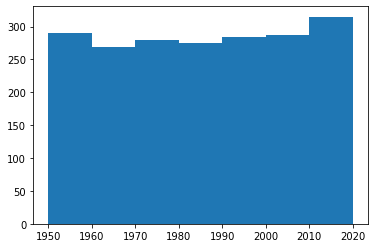

In [7]:
#(f)
plt.hist(birthyears,bins=7)
plt.show()

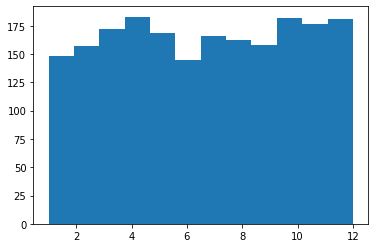

In [8]:
plt.hist(birthmonths,bins=12)
plt.show()

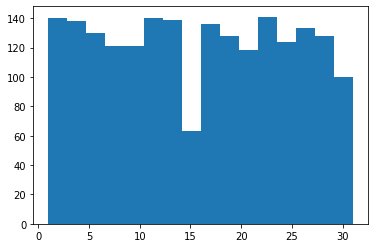

In [9]:
plt.hist(birthdays,bins=16)
plt.show()

In [10]:
# g. Determine mean, max, and min weights.
import statistics
weights = [float(i) for i in weights]
print(f'mean of weights: {round(statistics.mean(weights),2)}')
print(f'min weight: {min(weights)}')
print(f'max weight: {max(weights)}')

mean of weights: 56.52
min weight: 14.3
max weight: 94.2


In [11]:
# h. Determine mean, max, and min ages (with respect to current year, 2021).
import datetime
date = datetime.date.today()
current_year = int(date.strftime("%Y"))
x1 = statistics.mean(birthyears)
print(f'mean of ages: {round((current_year-x1),2)}')
print(f'min age: {current_year-max(birthyears)}')
print(f'max age: {current_year-min(birthyears)}')

mean of ages: 35.83
min age: 1
max age: 71


### [<span style="color: red;">7 points</span>] Question 2 
For this question, you will work with Messi.csv and Ronaldo.csv files. For those who are not familiar with Messi and Ronaldo, they are two of the best soccer players of all times. <br>
In both data sets, there are 6 columns as follows:
1. Start Year of the Season, 
2. End Year of the Season, 
3. Number of games played for the professional club
4. Number of games goals made for professional club
5. Number of games played for the national team
6. Number of games goals made for national team <br>

a. Read these two files and create lists of "seasonstart, seasonend, clubapp, clubgoal, natapp, natgoal" for both players. <br>
b. Generate the figure below in which we have 4 subplots. <br>
 - Start Year of the Season vs Number of games for Messi (club vs. national)
 - Start Year of the Season vs Number of games for Ronaldo  (club vs. national)
 - Start Year of the Season vs Number of goals for Messi (club vs. national)
 - Start Year of the Season vs Number of goals for Ronaldo  (club vs. national) 
 <br>
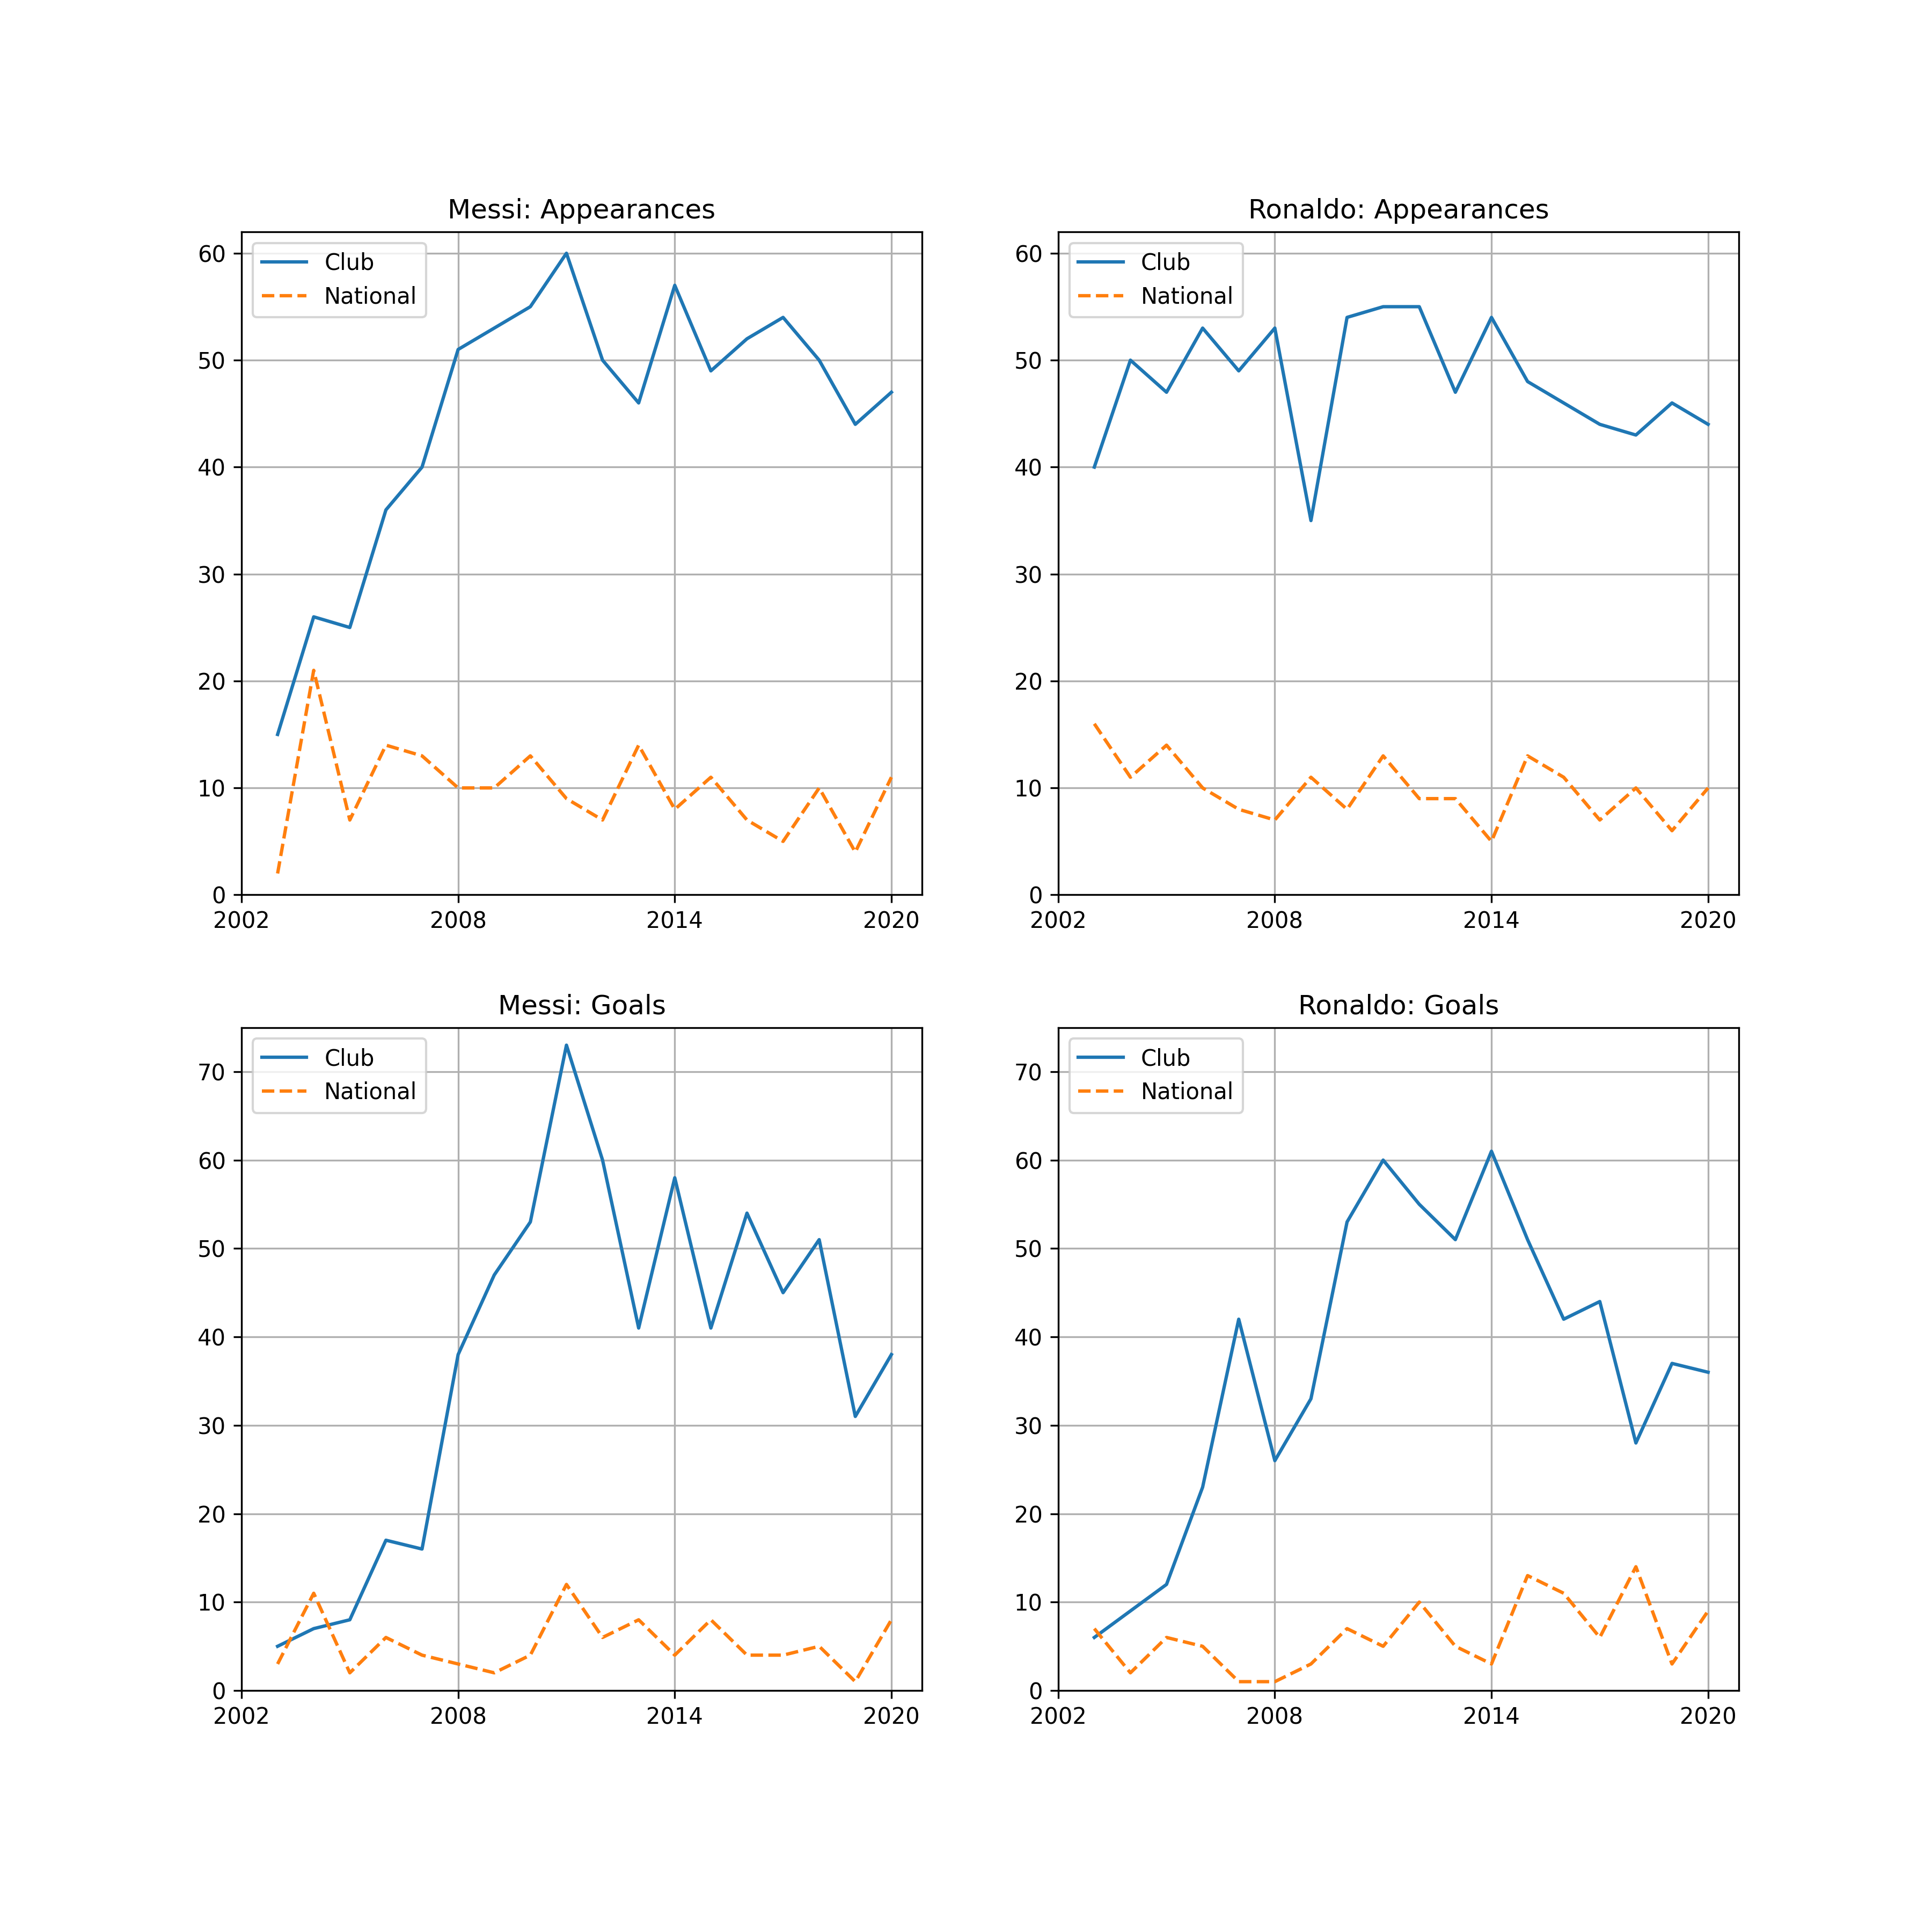 
Note that there are so many small details in the figure above. Pay attention to details <br>

c. Calculate total number of goals made by Messi (club+national). <br>
d. Calculate total number of goals made by Ronaldo (club+national). <br>
e. Calculate goals per game for Messi (club+national). <br>
f. Calculate goals per game for Ronaldo (club+national). <br>
g. Which one is better: Messi or Ronaldo? Be careful about your answer if you don't want to fail this class!

In [12]:
# Refered from class notes
seasonstart_m = []
seasonend_m = []
clubapp_m = []
clubgoal_m = []
natapp_m = [] 
natgoal_m = []

CSV_URL_MESSI="https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/Messi.csv"

with requests.Session() as s:
    download_m=s.get(CSV_URL_MESSI)
    decoded_content_m=download_m.content.decode('utf-8')
    csvreader_m = csv.reader(decoded_content_m.splitlines(),delimiter=',')
    next(csvreader_m)
    for row in csvreader_m:
        seasonstart_m.append(int(row[0]))
        seasonend_m.append(int(row[1]))
        clubapp_m.append(int(row[2]))
        clubgoal_m.append(int(row[3]))
        natapp_m.append(int(row[4]))
        natgoal_m.append(int(row[5]))
        
    

In [13]:

seasonstart_r = []
seasonend_r = []
clubapp_r = []
clubgoal_r = []
natapp_r = [] 
natgoal_r = []

CSV_URL_RONALDO="https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/Ronaldo.csv"
with requests.Session() as s:
    download_r=s.get(CSV_URL_RONALDO)
    decoded_content_r=download_r.content.decode('utf-8')
    csvreader_r = csv.reader(decoded_content_r.splitlines(), delimiter=',')
    next(csvreader_r, None)
    for row in csvreader_r:
        seasonstart_r.append(int(row[0]))
        seasonend_r.append(int(row[1]))
        clubapp_r.append(int(row[2]))
        clubgoal_r.append(int(row[3]))
        natapp_r.append(int(row[4]))
        natgoal_r.append(int(row[5]))
    

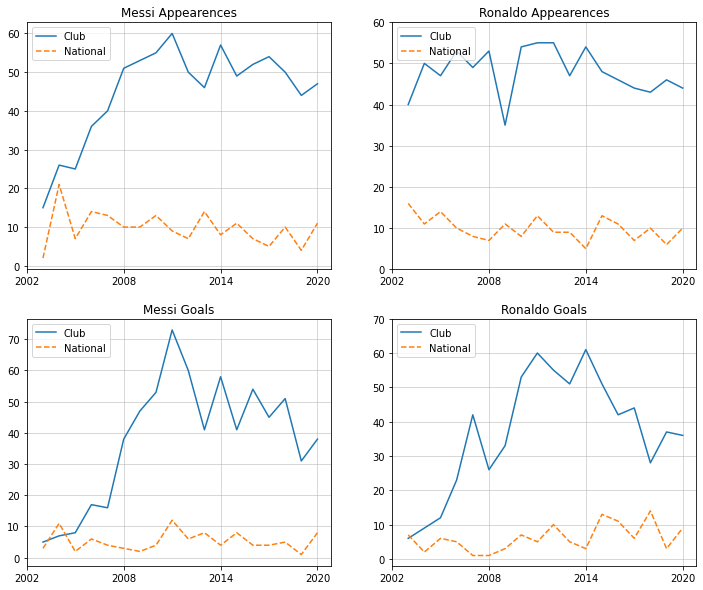

In [14]:
#(b)
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,10))
axis=[ax1,ax2,ax3,ax4]

ax1.plot(seasonstart_m,clubapp_m,label="Club")
ax1.plot(seasonstart_m,natapp_m,label="National",linestyle="--")
ax1.set_title("Messi Appearences", fontsize = 12)
ax1.set_yticks([0,10,20,30,40,50,60])

ax2.plot(seasonstart_r,clubapp_r,label="Club")
ax2.plot(seasonstart_r,natapp_r,label="National",linestyle="--")
ax2.set_title("Ronaldo Appearences", fontsize = 12)
ax2.set_yticks([0,10,20,30,40,50,60])

ax3.plot(seasonstart_m,clubgoal_m,label="Club")
ax3.plot(seasonstart_m,natgoal_m,label="National",linestyle="--")
ax3.set_title("Messi Goals", fontsize = 12)
ax3.set_yticks([0,10,20,30,40,50,60,70])

ax4.plot(seasonstart_r,clubgoal_r,label="Club")
ax4.plot(seasonstart_r,natgoal_r,label="National",linestyle="--")
ax4.set_title("Ronaldo Goals", fontsize = 12)
ax4.set_yticks([0,10,20,30,40,50,60,70])

for i in axis:
    i.grid(linewidth=0.5)
    i.set_xticks([2002,2008,2014,2020])
    i.legend(loc=2)


plt.show()


In [15]:

# Calculate total number of goals made by Messi (club+national).
club_m = sum(clubgoal_m)
national_m = sum(natgoal_m)
print(f"total number of goals made by Messi : {club_m + national_m}")

# Calculate total number of goals made by Ronaldo (club+national).
club_r = sum(clubgoal_r)
national_r = sum(natgoal_r)
print(f"total number of goals made by Ronaldo : {club_r + national_r}")



total number of goals made by Messi : 778
total number of goals made by Ronaldo : 780


In [16]:
# Calculate goals per game for Messi (club+national).
x=0
while x<len(seasonstart_m):
    print(f"Year:",seasonstart_m[x],"Attended:",clubapp_m[x]+natapp_m[x],"Goals:",clubgoal_m[x]+natgoal_m[x])
    x=x+1

a = sum(clubapp_m) + sum(natapp_m)
b = sum(clubgoal_m) + sum(natgoal_m)
avg = round((b/a),2)
print(f'goals per game by Messi :{avg}')

Year: 2003 Attended: 17 Goals: 8
Year: 2004 Attended: 47 Goals: 18
Year: 2005 Attended: 32 Goals: 10
Year: 2006 Attended: 50 Goals: 23
Year: 2007 Attended: 53 Goals: 20
Year: 2008 Attended: 61 Goals: 41
Year: 2009 Attended: 63 Goals: 49
Year: 2010 Attended: 68 Goals: 57
Year: 2011 Attended: 69 Goals: 85
Year: 2012 Attended: 57 Goals: 66
Year: 2013 Attended: 60 Goals: 49
Year: 2014 Attended: 65 Goals: 62
Year: 2015 Attended: 60 Goals: 49
Year: 2016 Attended: 59 Goals: 58
Year: 2017 Attended: 59 Goals: 49
Year: 2018 Attended: 60 Goals: 56
Year: 2019 Attended: 48 Goals: 32
Year: 2020 Attended: 58 Goals: 46
goals per game by Messi :0.79


In [17]:
# Calculate goals per game for Ronaldo (club+national).
i=0
while i<len(seasonstart_r):
    print(f"Year:",seasonstart_r[i],"Attended:",clubapp_r[i]+natapp_r[i],"Goals:",clubgoal_r[i]+natgoal_r[i])
    i=i+1

d = sum(clubapp_r) + sum(natapp_r)
e = sum(clubgoal_r) + sum(natgoal_r)
avg = round((e/d),2)
print(f'goals per game by Ronaldo : {avg}')

Year: 2003 Attended: 56 Goals: 13
Year: 2004 Attended: 61 Goals: 11
Year: 2005 Attended: 61 Goals: 18
Year: 2006 Attended: 63 Goals: 28
Year: 2007 Attended: 57 Goals: 43
Year: 2008 Attended: 60 Goals: 27
Year: 2009 Attended: 46 Goals: 36
Year: 2010 Attended: 62 Goals: 60
Year: 2011 Attended: 68 Goals: 65
Year: 2012 Attended: 64 Goals: 65
Year: 2013 Attended: 56 Goals: 56
Year: 2014 Attended: 59 Goals: 64
Year: 2015 Attended: 61 Goals: 64
Year: 2016 Attended: 57 Goals: 53
Year: 2017 Attended: 51 Goals: 50
Year: 2018 Attended: 53 Goals: 42
Year: 2019 Attended: 52 Goals: 40
Year: 2020 Attended: 54 Goals: 45
goals per game by Ronaldo : 0.75


Messi's goals per game is 0.4% higher than Ronaldo's

### [<span style="color: red;">4 points</span>] Question 3

Read the "season96_97.csv", where we have NBA player statistics from 1996-97 season. <br>
Use players' heights, weights and pts to recreate the visualization below, using matplotlib.plotly's scatter function. <br>

Note that 
 - scatter(x,y,z) creates small circles with a radius proportional to z at (x,y). Here, the size of these circles should change according to player's average points.
 -  Set the transparency value to 0.7.
 - Add text at x = 155, y = 65 as 'Muggsy Bogues'
 - Add text at x = 226, y = 155, as 'Sim Bhullar'
 - Add text at x= 233, y = 137, as 'Gheorghe Muresan'
 
Final output should look this. <br> 
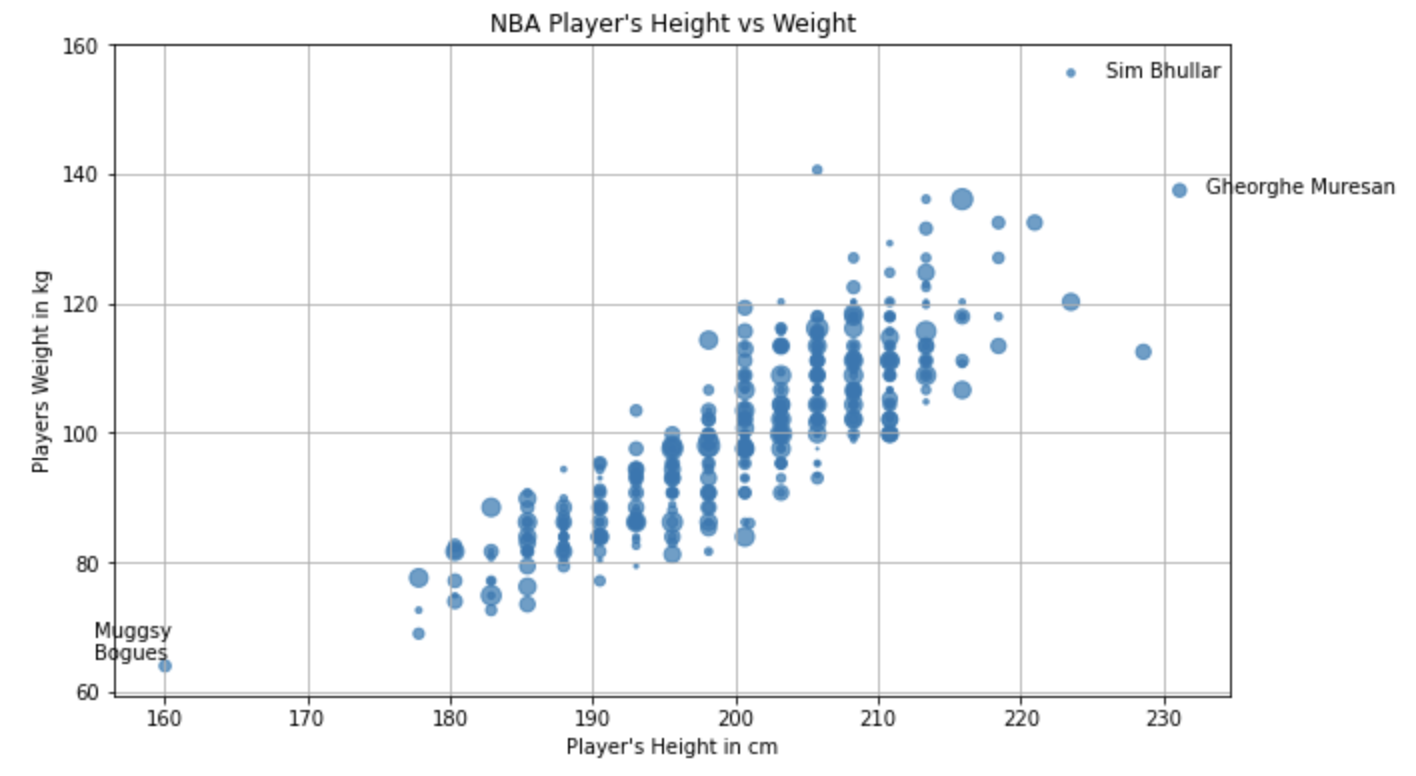 

Save the output as a png file, whose name includes yourname, e.g. 'HW2Q3_Ergun.png'

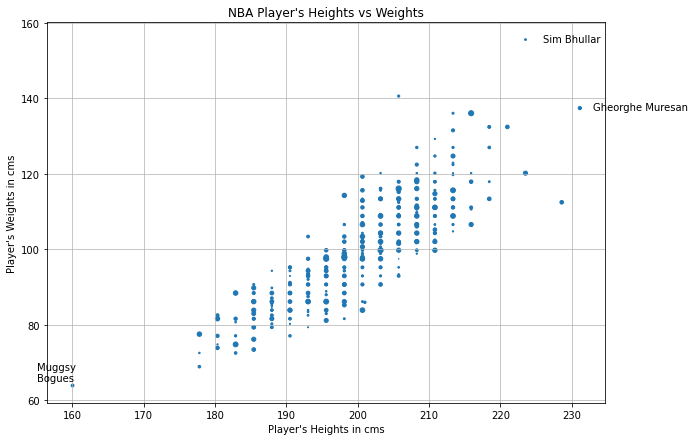

In [18]:
# Refered from class notes
CSV_URL="https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/season96_97.csv"

heights=[]
weights=[]
pts=[]

with requests.Session() as csv_file:
    download=s.get(CSV_URL)
    decoded_content=download.content.decode("utf-8")
    csv_reader=csv.reader(decoded_content.splitlines(),delimiter=",")
    next(csv_reader, None)
    for i in csv_reader:
        heights.append(float(i[3]))
        weights.append(float(i[4]))
        pts.append(float(i[5]))
        
fig=plt.figure(figsize=(10,7))
plt.scatter(heights,weights,s=pts,alpha=1)

plt.text(155,65,'Muggsy\nBogues', fontsize = 10)
plt.text(226,155,'Sim Bhullar',  fontsize=10)
plt.text(233,137,'Gheorghe Muresan', fontsize = 10)

plt.title("NBA Player's Heights vs Weights", fontsize = 12)
plt.xlabel("Player's Heights in cms", fontsize = 10)
plt.ylabel("Player's Weights in cms", fontsize = 10)
plt.grid(linewidth=0.7)

plt.show()
fig.savefig("HW2Q3_Ranjith_Reddy.png")